<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week1/04_Logistic_Regression%26K_NN_M%20Rakan%20Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/Social_Network_Ads.csv'

# Membaca file CSV
dataset = pd.read_csv(file_path)

## Informasi Data


In [ ]:
#Menampilkan beberapa baris pertama dari dataset untuk melihat seperti apa data tersebut.
print(dataset.head())



   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [ ]:
#Memberikan informasi tentang kolom, tipe data, dan apakah ada nilai kosong (missing values).
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [ ]:
#Menampilkan statistik deskriptif dari dataset, seperti rata-rata, standar deviasi, min, max, dan kuartil.
print(dataset.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


## Splitting the dataset into the Training set and Test set

In [ ]:
# Memisahkan dataset menjadi dua bagian
X = dataset[['Age', 'EstimatedSalary']]  # Fitur yang akan digunakan untuk prediksi (umur dan estimasi gaji)
y = dataset['Purchased']  # Target (apakah membeli atau tidak)


In [ ]:
# Membagi dataset menjadi data latih dan data uji (75% data latih, 25% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Menyesuaikan skala dengan data latih dan mentransformasikannya
X_test = sc.transform(X_test)  # Menggunakan skala yang sama untuk data uji


## Training the Logistic Regression model on the Training set

In [ ]:
# Membuat model Regresi Logistik
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)  # Melatih model dengan data latih

LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
# Membuat prediksi untuk data baru
new_data = [[30, 87000]]  # Contoh data baru (Age=30, Estimated Salary=87000)
new_data_scaled = sc.transform(new_data)  # Melakukan standardisasi pada data baru
new_prediction = classifier.predict(new_data_scaled)  # Melakukan prediksi
print("Prediction for new data (Age=30, Estimated Salary=87000):", new_prediction)  # Menampilkan hasil prediksi

Prediction for new data (Age=30, Estimated Salary=87000): [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [ ]:
# Membuat Confusion Matrix untuk mengevaluasi performa model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)  # Menampilkan Confusion Matrix

Confusion Matrix:
 [[64  4]
 [ 3 29]]


## Making the Confusion Matrix

Confusion Matrix:
 [[64  4]
 [ 3 29]]


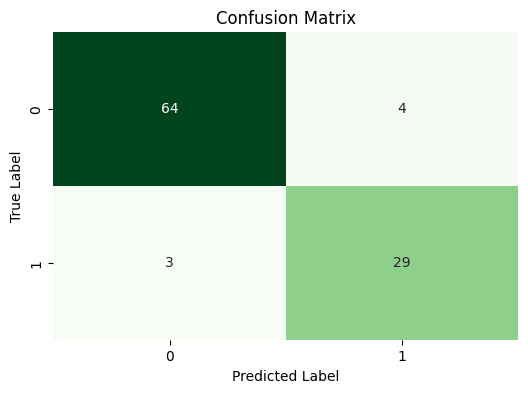

In [ ]:
# Membuat Confusion Matrix untuk mengevaluasi performa model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)  # Menampilkan Confusion Matrix

# Menampilkan Confusion Matrix sebagai Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)  # Membuat heatmap dari Confusion Matrix
plt.title('Confusion Matrix')  # Judul dari plot
plt.xlabel('Predicted Label')  # Label sumbu-x
plt.ylabel('True Label')  # Label sumbu-y
plt.show()  # Menampilkan plot

## Visualising the Training set results

<ipython-input-56-4658c44ff49d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


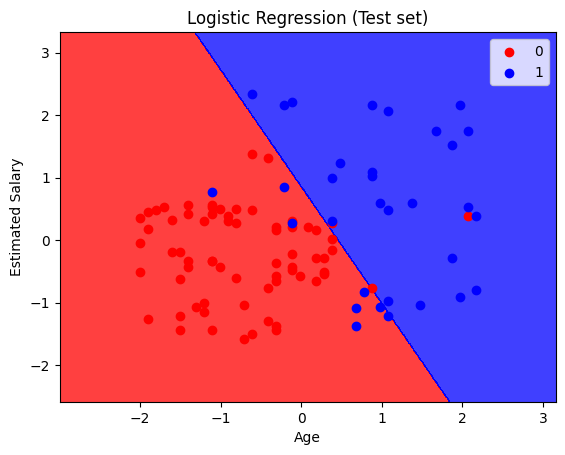

In [ ]:
X_set, y_set = X_test, y_test  # Mengambil data uji untuk divisualisasikan
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))  # Membuat grid untuk plot area keputusan
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'blue')))  # Membuat area keputusan dengan warna berbeda untuk tiap kelas
plt.xlim(X1.min(), X1.max())  # Batas sumbu x
plt.ylim(X2.min(), X2.max())  # Batas sumbu y
# Menampilkan titik-titik data uji pada plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')  # Judul plot untuk data uji
plt.xlabel('Age')  # Label sumbu-x (Umur)
plt.ylabel('Estimated Salary')  # Label sumbu-y (Estimasi Gaji)
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot


## Visualising the Test set results

<ipython-input-57-6c847aa206f3>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


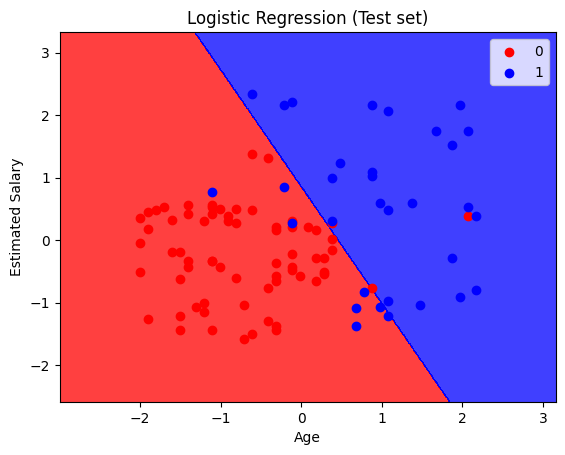

In [ ]:
# Mengambil data uji dan targetnya untuk divisualisasikan
X_set, y_set = X_test, y_test

# Membuat grid untuk area keputusan
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),  # Membuat range nilai untuk fitur "Age"
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)   # Membuat range nilai untuk fitur "Estimated Salary"
)

# Menggunakan classifier untuk memprediksi hasil pada setiap titik dalam grid (untuk area keputusan)
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Mengubah grid menjadi bentuk yang sesuai untuk prediksi
    alpha=0.75,  # Menentukan tingkat transparansi area keputusan
    cmap=ListedColormap(('red', 'blue'))  # Warna untuk masing-masing kelas, merah dan biru
)

# Menetapkan batas pada sumbu-x dan sumbu-y
plt.xlim(X1.min(), X1.max())  # Batas minimum dan maksimum sumbu x
plt.ylim(X2.min(), X2.max())  # Batas minimum dan maksimum sumbu y

# Menampilkan titik-titik data asli untuk masing-masing kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],  # Menentukan koordinat titik-titik yang sesuai dengan kelas "j"
        c=ListedColormap(('red', 'blue'))(i),  # Warna titik sesuai dengan kelas
        label=j  # Memberikan label pada legenda untuk kelas "j"
    )

# Menambahkan judul dan label pada plot
plt.title('Logistic Regression (Test set)')  # Judul dari plot untuk data uji
plt.xlabel('Age')  # Label untuk sumbu x (Umur)
plt.ylabel('Estimated Salary')  # Label untuk sumbu y (Estimasi Gaji)
plt.legend()  # Menampilkan legenda yang menunjukkan label kelas
plt.show()  # Menampilkan plot


#KESIMPULAN

## Kesimpulannya adalah, Logistic Regression memberikan solusi yang sederhana dan dapat diinterpretasikan dengan baik untuk masalah klasifikasi biner dalam dataset ini. Namun, untuk hasil yang lebih akurat, terutama jika terdapat pola yang kompleks dalam data, dapat dipertimbangkan penggunaan model yang lebih canggih atau pendekatan yang melibatkan lebih banyak fitur yang relevan.

# MODEL K-NN


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/Social_Network_Ads.csv'

# Membaca file CSV
dataset = pd.read_csv(file_path)

## Informasi Data

In [ ]:
#Menampilkan beberapa baris pertama dari dataset untuk melihat seperti apa data tersebut.
print(dataset.head())


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [ ]:
#Memberikan informasi tentang kolom, tipe data, dan apakah ada nilai kosong (missing values).
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [ ]:
#Menampilkan statistik deskriptif dari dataset, seperti rata-rata, standar deviasi, min, max, dan kuartil.
print(dataset.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


## Splitting the dataset into the Training set and Test set

In [ ]:
# Memisahkan dataset menjadi dua bagian
X = dataset[['Age', 'EstimatedSalary']]  # Fitur input (Age dan EstimatedSalary)
y = dataset['Purchased']  # Target output (apakah produk dibeli atau tidak)

In [ ]:
# Memisahkan dataset menjadi set pelatihan dan set pengujian, dengan 25% data digunakan untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Menstandarisasi data pelatihan
X_test = sc.transform(X_test)  # Menstandarisasi data pengujian


## Training the Logistic Regression model on the Training set

In [ ]:
# Membuat dan melatih model KNN pada set pelatihan
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Menggunakan 5 tetangga dengan jarak Euclidean
knn_classifier.fit(X_train, y_train)  # Melatih model KNN

KNeighborsClassifier()

## Predicting a new result

In [ ]:
# Predicting a new result
# Memprediksi hasil untuk data baru (contoh: umur 30 tahun, gaji 87000)
new_data = [[30, 87000]]  # Contoh data baru (Age=30, Estimated Salary=87000)
new_data_scaled = sc.transform(new_data)  # Menstandarisasi data baru agar sesuai dengan model
new_prediction = knn_classifier.predict(new_data_scaled)  # Melakukan prediksi
print("Prediction for new data (Age=30, Estimated Salary=87000):", new_prediction)  # Menampilkan hasil prediksi


Prediction for new data (Age=30, Estimated Salary=87000): [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [ ]:
# Memprediksi hasil untuk set data pengujian
y_pred = knn_classifier.predict(X_test)  # Melakukan prediksi pada set pengujian
print("Test Set Predictions:\n", y_pred)  # Menampilkan hasil prediksi untuk set pengujian


Test Set Predictions:
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


## Making the Confusion Matrix

Confusion Matrix:
 [[64  4]
 [ 3 29]]


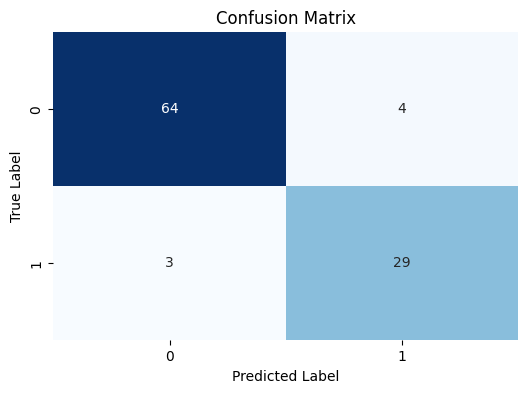

In [ ]:
# Membuat matriks kebingungan untuk mengevaluasi performa model
cm = confusion_matrix(y_test, y_pred)  # Membandingkan nilai sebenarnya dengan nilai prediksi
print("Confusion Matrix:\n", cm)  # Menampilkan matriks kebingungan

# Menampilkan Confusion Matrix sebagai Heatmap
plt.figure(figsize=(6, 4))  # Mengatur ukuran figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Menampilkan matriks kebingungan sebagai heatmap
plt.title('Confusion Matrix')  # Judul grafik
plt.xlabel('Predicted Label')  # Label untuk sumbu X
plt.ylabel('True Label')  # Label untuk sumbu Y
plt.show()  # Menampilkan plot

## Visualising the Training set results

<ipython-input-71-d585ff7efbd6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  # Menampilkan data pelatihan


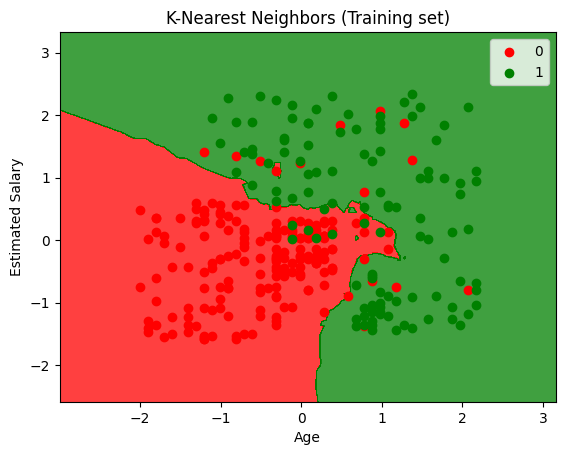

In [ ]:
# Visualisasi hasil set pelatihan untuk menunjukkan area keputusan model
X_set, y_set = X_train, y_train  # Mengambil set pelatihan
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),  # Membuat grid untuk fitur pertama
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))  # Membuat grid untuk fitur kedua
plt.contourf(X1, X2, knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Menggambar area keputusan
             alpha=0.75, cmap=ListedColormap(('red', 'green')))  # Menggunakan warna merah dan hijau untuk dua kelas
plt.xlim(X1.min(), X1.max())  # Mengatur batas sumbu X
plt.ylim(X2.min(), X2.max())  # Mengatur batas sumbu Y
for i, j in enumerate(np.unique(y_set)):  # Loop untuk setiap kelas (0 dan 1)
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  # Menampilkan data pelatihan
                c=ListedColormap(('red', 'green'))(i), label=j)  # Menggunakan warna yang berbeda untuk setiap kelas
plt.title('K-Nearest Neighbors (Training set)')  # Judul grafik
plt.xlabel('Age')  # Label untuk sumbu X
plt.ylabel('Estimated Salary')  # Label untuk sumbu Y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

## Visualising the Test set results

<ipython-input-72-472f9ed295d1>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  # Menampilkan data pengujian


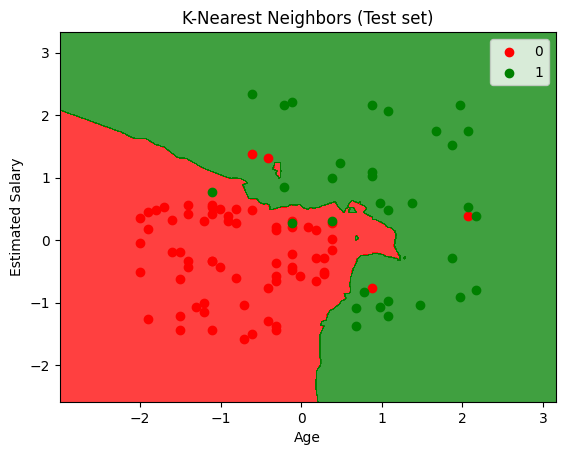

In [ ]:
# Visualisasi hasil set pengujian untuk menunjukkan area keputusan model
X_set, y_set = X_test, y_test  # Mengambil set pengujian
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),  # Membuat grid untuk fitur pertama
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))  # Membuat grid untuk fitur kedua
plt.contourf(X1, X2, knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  # Menggambar area keputusan
             alpha=0.75, cmap=ListedColormap(('red', 'green')))  # Menggunakan warna merah dan hijau untuk dua kelas
plt.xlim(X1.min(), X1.max())  # Mengatur batas sumbu X
plt.ylim(X2.min(), X2.max())  # Mengatur batas sumbu Y
for i, j in enumerate(np.unique(y_set)):  # Loop untuk setiap kelas (0 dan 1)
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  # Menampilkan data pengujian
                c=ListedColormap(('red', 'green'))(i), label=j)  # Menggunakan warna yang berbeda untuk setiap kelas
plt.title('K-Nearest Neighbors (Test set)')  # Judul grafik
plt.xlabel('Age')  # Label untuk sumbu X
plt.ylabel('Estimated Salary')  # Label untuk sumbu Y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

#KESIMPULAN

##Kesimpulan, model KNN yang digunakan di sini dapat memberikan prediksi yang cukup baik dengan bantuan normalisasi data dan parameter yang dipilih dengan tepat. Visualisasi memberikan pandangan tambahan yang membantu dalam memahami bagaimana model membuat keputusan klasifikasi berdasarkan pola dalam data.

##PERBANDINGAN ANTARA MODEL LOGISTIC REGRESSION DAN KNN PADA DATASET YG SAMA :

## Secara keseluruhan, jika tujuan utama adalah mendapatkan hasil yang cepat dan interpretasi yang mudah, Logistic Regression akan lebih efisien. Namun, jika tujuan adalah untuk menangkap lebih banyak kompleksitas dalam data dan jika ada indikasi hubungan non-linier, KNN dengan parameter k yang tepat dapat menjadi pilihan yang lebih efektif.